In [10]:
import sys
import os
my_path = os.path.dirname(os.getcwd())
sys.path.append(my_path)

# from prev_ob_models.Doxey2022.isolated_cells import *
import prev_ob_models.Doxey2022.isolated_cells as ic
from neuron import h
from neuron.units import ms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if not os.path.isdir('../prev_ob_models/Doxey2022/Mechanisms/x86_64'):
    os.system('python ../prev_ob_models/Doxey2022/compile_mechs.py')
else:
    print('Mechanisms already compiled')

Mechanisms already compiled


In [3]:
gc_cell = ic.GC1()

In [4]:
h.cvode_active(0)
delay = 200
dur = 700
h.tstop = 1000
h.celsius = 35
h.steps_per_ms = 10
h.dt = 1.0 / h.steps_per_ms

In [6]:
# ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.soma)

# vecStim = h.VecStim()
# vec = h.Vector(np.random.uniform(200,400))
# vec.indgen()

# vecStim.play(vec)

# netCon = h.NetCon(vecStim, ampa_nmda)
# netCon.weight[0] = 1

# [v for v in vec]

Text(0, 0.5, 'membrane potential (mV)')

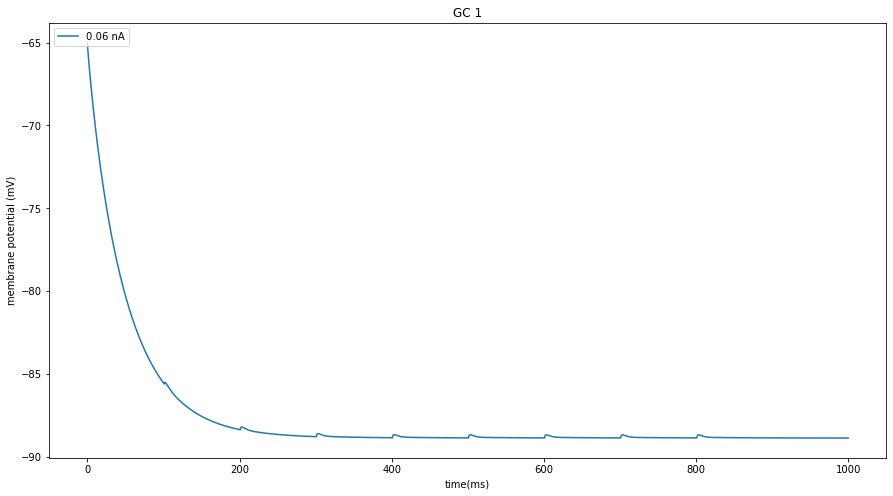

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(15,8), sharey=True)
# axs = axs.ravel()

amp = 0.06
# iclamp = h.IClamp(0.5, sec=gc_cell.soma)
# iclamp.delay = delay
# iclamp.amp = amp
# iclamp.dur = dur

ampa_nmda = h.AmpaNmdaSyn(0.5, sec=gc_cell.soma)

# spike_train = h.NetStim()
# spike_train.interval = 100
# spike_train.start = 100
# netCon = h.NetCon(spike_train, ampa_nmda)
# netCon.weight[0] = 1

spike_train = h.Vector([100*i*ms for i in range(1,9)])
vecStim = h.VecStim()
vecStim.play(spike_train)
netCon = h.NetCon(vecStim, ampa_nmda)
netCon.weight[0] = 1

t = h.Vector().record(h._ref_t)
v = h.Vector().record(gc_cell.soma(0.5)._ref_v)

h.run()

axs.plot(t, v, label=f'{amp} nA')
    
axs.set_title(f'{gc_cell.cell_type} {gc_cell.cell_id}')

axs.legend(loc='upper left')
# axs[idx].set_ylim((-110,30))
axs.set_xlabel('time(ms)')

axs.set_ylabel('membrane potential (mV)')